In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
datax=pd.read_csv('/content/Movie_collection_Independent.csv')
datay=pd.read_csv('/content/Movie_collection_Target.csv')

In [ ]:
datax.head()

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre_Thriller,Genre_Drama,Genre_Comedy
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,1,0,0
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,0,0,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [ ]:
datay.head()

,Collection
0,2.266667
1,2.106667
2,2.980000
3,2.893333
4,3.080000


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(datax,datay,random_state=42)
xtrain,xvalid,ytrain,yvalid=train_test_split(xtrain,ytrain,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)
xvalid=scaler.fit_transform(xvalid)

In [ ]:
datax.shape

(506, 19)

In [ ]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[19]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                600       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________


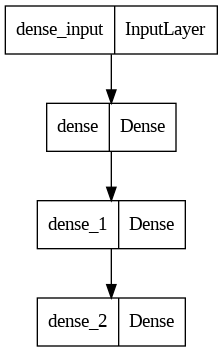

In [ ]:
import pydot
keras.utils.plot_model(model)

In [ ]:
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(learning_rate=1e-3),metrics=["mae"])

In [ ]:
trainedmodel=model.fit(xtrain,ytrain,epochs=150,validation_data=(xvalid,yvalid))

Epoch 1/150
9/9 [==============================] - 0s 13ms/step - loss: 0.1542 - mae: 0.2983 - val_loss: 0.2309 - val_mae: 0.3624
Epoch 2/150
9/9 [==============================] - 0s 7ms/step - loss: 0.1538 - mae: 0.2977 - val_loss: 0.2302 - val_mae: 0.3620
Epoch 3/150
9/9 [==============================] - 0s 8ms/step - loss: 0.1532 - mae: 0.2973 - val_loss: 0.2297 - val_mae: 0.3616
Epoch 4/150
9/9 [==============================] - 0s 9ms/step - loss: 0.1526 - mae: 0.2964 - val_loss: 0.2290 - val_mae: 0.3610
Epoch 5/150
9/9 [==============================] - 0s 9ms/step - loss: 0.1521 - mae: 0.2960 - val_loss: 0.2286 - val_mae: 0.3608
Epoch 6/150
9/9 [==============================] - 0s 6ms/step - loss: 0.1515 - mae: 0.2950 - val_loss: 0.2279 - val_mae: 0.3602
Epoch 7/150
9/9 [==============================] - 0s 7ms/step - loss: 0.1510 - mae: 0.2946 - val_loss: 0.2273 - val_mae: 0.3597
Epoch 8/150
9/9 [==============================] - 0s 8ms/step - loss: 0.1505 - mae: 0.2939 - va

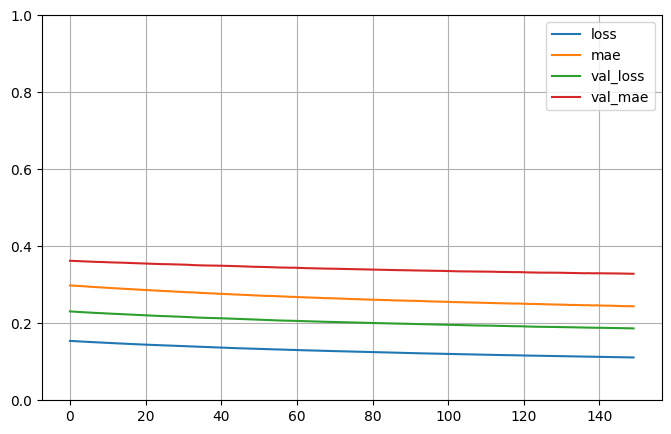

In [ ]:
import pandas as pd
pd.DataFrame(trainedmodel.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(xtest,ytest)

4/4 [==============================] - 0s 5ms/step - loss: 0.1904 - mae: 0.3069


[0.19035813212394714, 0.30691391229629517]

In [ ]:
xtest_new=xtest[:5]
y_prob=model.predict(xtest_new)
print(y_prob)
print(ytest[:5])

1/1 [==============================] - 0s 91ms/step
[[2.538447 ]
 [2.8252993]
 [1.6908071]
 [2.780196 ]
 [1.8981122]]
     Collection
173    2.240000
274    2.826667
491    1.573333
72     2.186667
452    1.740000


In [ ]:
xtest.shape

(127, 19)